# Prática 1: Geração de Canal Plano Rayleigh

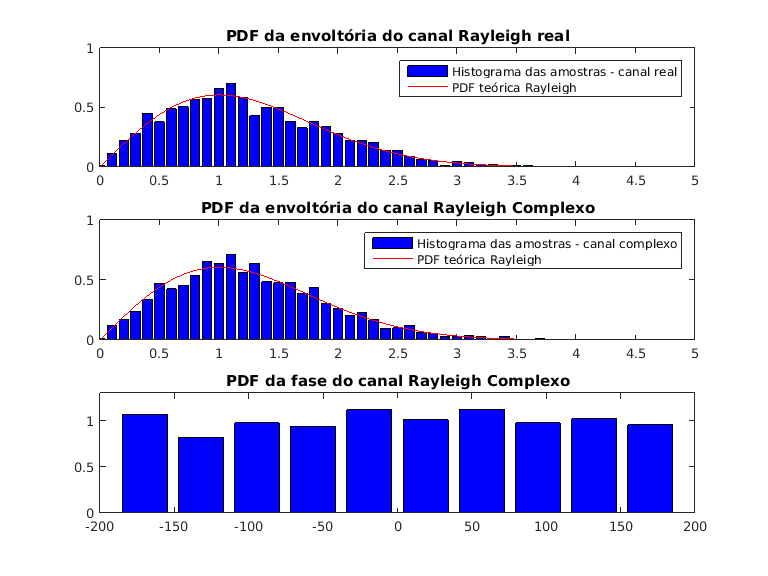

In [5]:
clear
N=2000;
ts=0.1;
x=0:ts:ts+5;
sigma=1;
u=rand(N,1);
rReal=sigma*sqrt(-2*log(u));
pdfTeo=(x./(sigma^2)).*exp(-((x./sigma).^2)/2);
rComplexo=randn(N,1)+j*randn(N,1);

fig = figure;
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 8 6];
subplot(3,1,1)

xh=hist(rReal,x);
temp=x(1:length(x)-1);
width=ts;
bar(temp,xh(1:length(xh)-1)./(sum(xh(1:length(xh)-1)).*ts),'b')
hold on
plot(x,pdfTeo,'r')
legend('Histograma das amostras - canal real','PDF teórica Rayleigh')
xlim([0,5])
title('PDF da envoltória do canal Rayleigh real')

subplot(3,1,2)
xh=hist(abs(rComplexo),x);
temp=x(1:length(x)-1);
width=ts;
bar(temp,abs(xh(1:length(xh)-1))./(sum(abs(xh(1:length(xh)-1)).*ts)),'b')
hold on
plot(x,pdfTeo,'r')
legend('Histograma das amostras - canal complexo','PDF teórica Rayleigh')
xlim([0,5])
title('PDF da envoltória do canal Rayleigh Complexo')

subplot(3,1,3)

xhra=hist(angle(rComplexo));
bar(linspace(-170,170,10),xhra./(sum(xhra)*ts) ,'b')

title('PDF da fase do canal Rayleigh Complexo')
ylim([0, 1.3])


# Prática 2: Geração de canal plabo com desvanecimento Rice

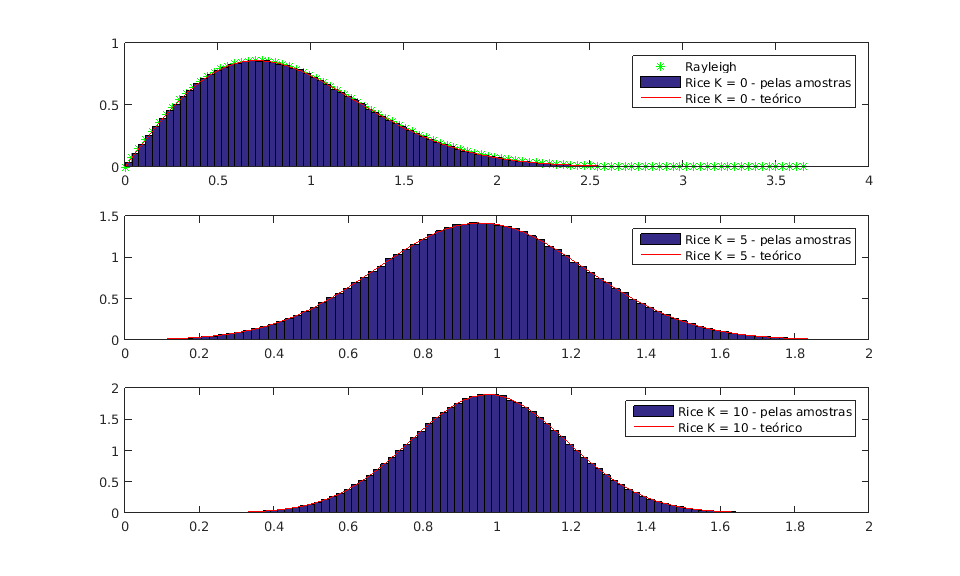

In [2]:
clear
N=1e6;
vtK=[0 5 10];
totPower=1;

fig = figure;
    fig.PaperUnits = 'inches';
    fig.PaperPosition = [0 0 10 6];
for ik=1:length(vtK)
    K=vtK(ik);
    s=sqrt(K/(K+1)*totPower);
    sigma=totPower/sqrt(2*(K+1));
    
    X=s+sigma*randn(N,1);
    Y=0+sigma*randn(N,1);
    Z=X+j*Y;
    [val,bins]=hist(abs(Z),100);
    binWidth=bins(2)-bins(1);
    r=0:binWidth:max(bins);
    
    subplot(3,1,ik)
    if K==0
        rayleigh_pdf=r./(sigma.^2).*exp(-r.^2/(2*sigma.^2));
        plot(r,rayleigh_pdf,'g*')
        hold on
        fRice=(2.*r*(K+1)./totPower).*(exp(-r.^2.*(K+1)/totPower-K)).*besseli(0,2.*r.*sqrt(K*(K+1)./totPower));
    
        bar(bins,val./(binWidth*sum(val)),1)
        hold on
        plot(r,fRice,'r')
        legend(['Rayleigh'],['Rice K = ',num2str(K),' - pelas amostras'],['Rice K = ',num2str(K),' - teórico'])
        xlim([0 4])
    else    
        fRice=(2.*r*(K+1)./totPower).*(exp(-r.^2.*(K+1)/totPower-K)).*besseli(0,2.*r.*sqrt(K*(K+1)./totPower));
    
        bar(bins,val./(binWidth*sum(val)),1)
        legend()
        hold on
        plot(r,fRice,'r')
        xlim([0 2])
        legend(['Rice K = ',num2str(K),' - pelas amostras'],['Rice K = ',num2str(K),' - teórico'])
    end
end

# Prática 3: Desempenho de modulação digital sujeito a Desvanecimento Rayleigh

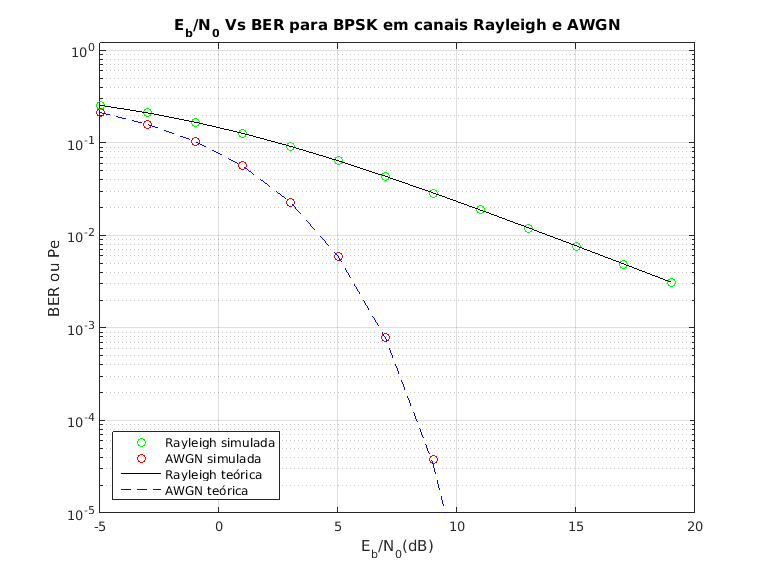

In [26]:
clear
N=10^6;
EbN0dB=-5:2:20;
d=rand(N,1)>0.5;
x=2.*d-1;
fig = figure;
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 8 6];
BER_rayleigh_simulada=zeros(length(EbN0dB));
BER_awgn_simulada=zeros(length(EbN0dB));
g(1) = hggroup;
g(2) = hggroup;
g(3) = hggroup;
g(4)= hggroup;

for i=1:length(EbN0dB)
    noise=1/sqrt(2).*(randn(N,1)+j.*randn(N,1));
    n=noise*10^(-EbN0dB(i)/20);
    h=1/sqrt(2)*(randn(N,1)+j*randn(N,1));
    y_awgn=x+n;
    y_rayleigh=h.*x+n;
    y_rayleigh_cap=y_rayleigh./h;
    r_rayleigh=real(y_rayleigh_cap)>0;
    r_awgn=real(y_awgn)>0;
    BER_rayleigh_simulada(i)=sum(bitxor(d,r_rayleigh));
    BER_awgn_simulada(i)=sum(bitxor(d,r_awgn));
end

BER_rayleigh_simulada=BER_rayleigh_simulada/N;
BER_awgn_simulada=BER_awgn_simulada/N;
EbN0=10.^(EbN0dB/10);
BER_rayleigh_teorica=0.5.*(1-sqrt(EbN0./(1+EbN0)));
BER_awgn_teorica = 0.5*erfc(sqrt(EbN0));


semilogy(EbN0dB,BER_rayleigh_simulada,'go','Parent',g(1))

hold on
semilogy(EbN0dB,BER_awgn_simulada,'ro','Parent',g(2))
semilogy(EbN0dB,BER_rayleigh_teorica,'k-','Parent',g(3))
semilogy(EbN0dB,BER_awgn_teorica,'b--','Parent',g(4))
grid on
xlabel('E_b/N_0(dB)')
ylabel('BER ou Pe')
legend([g(1),g(2),g(3),g(4)],'Rayleigh simulada','AWGN simulada','Rayleigh teórica','AWGN teórica','Location','southwest');
axis([-5 20 10^-5 1.2])
title('E_b/N_0 Vs BER para BPSK em canais Rayleigh e AWGN')

# Prática 4: Desempenho de modulação digital sujeito a Desvanecimento Rice

Simulado K = 0
Simulado K = 5
Simulado K = 30


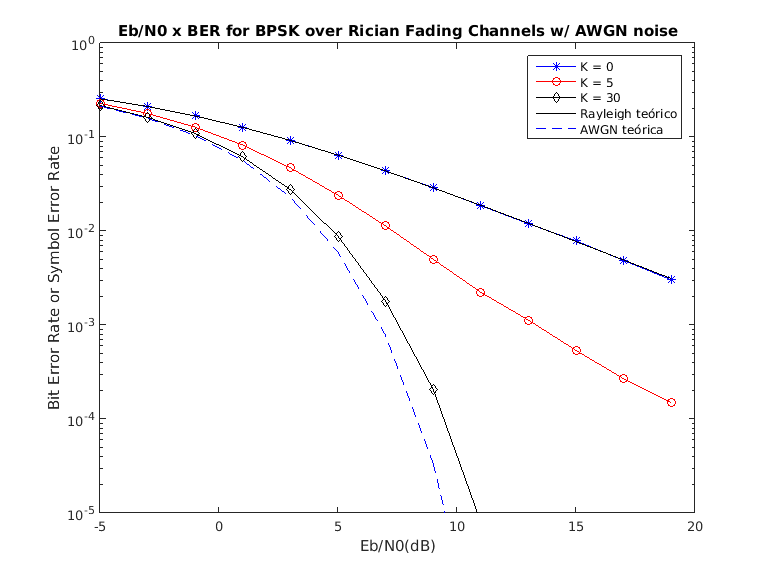

In [21]:
clear
clc
close all
N=10^6;
EbN0dB=-5:2:20;
EbN0=10.^(EbN0dB/10);
totPower=1;
K=[0 5 30];
d=rand(N,1)>0.5;
x=2.*d-1;
simBER_ricean=zeros(length(EbN0dB));
fig = figure;
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 8 6];
plotStyleSim=['b-*';'r-o';'k-d';'g-^';'m->';'c-<'];
chLegend=[];

g(1) = hggroup;
g(2) = hggroup;
g(3) = hggroup;
g(4)= hggroup;
g(5)= hggroup;
%chLegend = {'K = 0';'K = 5';'K = 30';'Rayleigh teórico';'AWGN teórica'};
for i=1:length(K)
    k=K(i);
    disp(['Simulado K = ',num2str(k)])
    s = sqrt( k/(k+1)*totPower );
    sigma = totPower/sqrt(2*(k+1));
    for ik=1:length(EbN0dB)
        noise = 1./sqrt(2).*(randn(N,1)+j.*randn(N,1));
        n = noise*10^(-EbN0dB(ik)/20);
        h = ((sigma.*randn(N,1)+s)+j.*(randn(N,1).*sigma+0));
        y_ricean=h.*x+n ;
        y_ricean_cap=y_ricean./h ;
        r_ricean=real(y_ricean_cap)>0;
        simBER_ricean(ik)=sum(bitxor(d,r_ricean));
    end
    simBER_ricean=simBER_ricean./N;
    %semilogy(EbN0dB,simBER_ricean,plotStyleSim(i,1:3))
    str = sprintf('g%i',i);
    semilogy(EbN0dB,simBER_ricean,plotStyleSim(i,1:end),'Parent',g(i))
    hold on
    %chLegend=[chLegend;{['K = ' num2str(k)]}];
end

BER_rayleigh_teorica = 0.5.*(1-sqrt(EbN0./(1+EbN0)));
BER_awgn_teorica = 0.5*erfc(sqrt(EbN0));
semilogy(EbN0dB,BER_rayleigh_teorica,'k-','Parent',g(4));

%chLegend=[chLegend;{['Rayleigh teórico']}];
semilogy(EbN0dB,BER_awgn_teorica,'b--','Parent',g(5));
%chLegend=[chLegend;{['AWGN teórica']}];

title('Eb/N0 x BER for BPSK over Rician Fading Channels w/ AWGN noise');
xlabel('Eb/N0(dB)');
ylabel('Bit Error Rate or Symbol Error Rate');
axis([-5 20 10^(-5) 10^0]);
%legend(chLegend);
legend([g(1),g(2),g(3),g(4),g(5)],'K = 0','K = 5','K = 30','Rayleigh teórico','AWGN teórica')


        
